<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/subjects/engineering/mechanics/mechanical_aspects_of_mechatronics_systems/problem_angular_velocity_conversion_crank_mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Angular velocities conversion (for a Crank Mechanism)

In [2]:
# imports
import pandas as pd
import math
import unittest

Problem: From the configuration diagrams shown below, choose the crank that has the highest angular velocity.

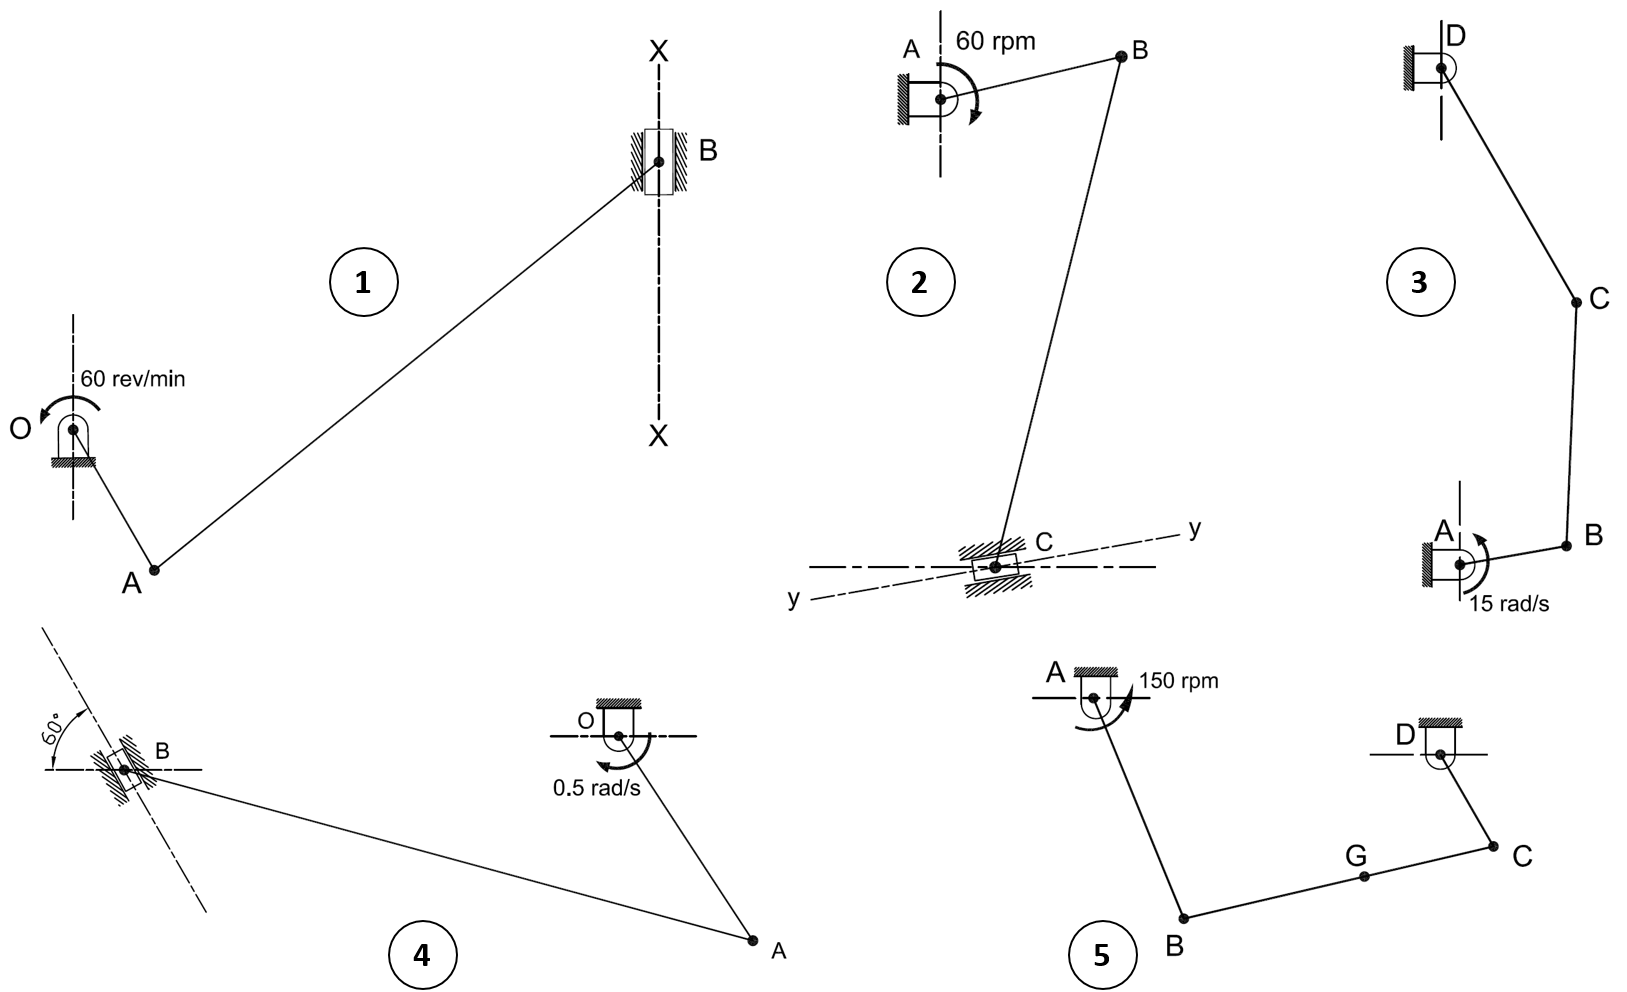

In [26]:
cols = ['cranks', 'angular_velocities', 'units']
cranks = [1, 2, 3, 4, 5]
angular_velocities = [60, 60, 15, 0.5, 150]
units = ['rpm', 'rpm', 'rad_per_s', 'rad_per_s', 'rpm']
d = {'cranks': cranks,
     'angular_velocities': angular_velocities,
     'units': units}
df = pd.DataFrame(d)
df

,cranks,angular_velocities,units
0,1,60.0,rpm
1,2,60.0,rpm
2,3,15.0,rad_per_s
3,4,0.5,rad_per_s
4,5,150.0,rpm


## Converting units

Conversion of angular velocities from rpm to rad/s is a simple task. It can be done by using the following formula:

$$\omega_{rad\_per\_s} = \omega_{rev\_per\_minute} * \frac{2\pi}{60}$$

It is because one revolution (`r` in rpm) is equal to 360 degrees, which are equal to 2pi radians. Because `pm` in rpm means per minute and we are interested in radians per second, then we need to devide the value by 60.

In [27]:
# 1 rpm => (2pi/60) rad/s
# we can use this value for conversion if we want
# we could multiply number of revolutions per minute by this value to obtain the value in radians per second
rpm_unit_factor = 2 * math.pi/60  # rad/s
rpm_unit_factor

0.10471975511965977

In [28]:
# test of this method
df['angular_velocities_factor_rad_per_s'] = df.apply(
    lambda row: row.angular_velocities * rpm_unit_factor if row.units == 'rpm' else row.angular_velocities, axis=1)
df

,cranks,angular_velocities,units,angular_velocities_factor_rad_per_s
0,1,60.0,rpm,6.283185
1,2,60.0,rpm,6.283185
2,3,15.0,rad_per_s,15.000000
3,4,0.5,rad_per_s,0.500000
4,5,150.0,rpm,15.707963


In [29]:
def convert_rpm_to_rad_per_s(rpm):
    """Convert RPM (revolutions per minute) to radians per second.

    Args:
    rpm (float): The RPM value to be converted.

    Returns:
    float: The equivalent radians per second value.
    """
    return (rpm * 2 * math.pi)/60


def convert_rad_per_s_to_rpm(rad_per_s):
    """Convert radians per second to RPM (revolutions per minute).

    Args:
    rad_per_s (float): The radians per second value to be converted.

    Returns:
    float: The equivalent RPM value.
    """
    return (rad_per_s * 60) / (2 * math.pi)

### Unit tests

In [30]:
class TestRpmToRadPerSec(unittest.TestCase):
    def test_conversion_one_rev_per_second(self):
        self.assertAlmostEqual(convert_rpm_to_rad_per_s(60), 6.28, places=2)

    def test_conversion_1_rpm(self):
        self.assertAlmostEqual(convert_rpm_to_rad_per_s(1), 0.10, places=2)

    def test_conversion_180_rpm(self):
        self.assertAlmostEqual(convert_rpm_to_rad_per_s(180), 18.85, places=2)

    def test_zero_input(self):
        # Test that 0 RPM returns 0 rad/s
        self.assertEqual(convert_rpm_to_rad_per_s(0), 0)

In [31]:
res = unittest.main(argv=[''], verbosity=2, exit=False)

test_conversion_180_rpm (__main__.TestRpmToRadPerSec) ... ok
test_conversion_1_rpm (__main__.TestRpmToRadPerSec) ... ok
test_conversion_one_rev_per_second (__main__.TestRpmToRadPerSec) ... ok
test_zero_input (__main__.TestRpmToRadPerSec) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


In [34]:
# apply conversion based on the unit
df['angular_velocities_converted_rad_per_s'] = df.apply(lambda x: convert_rpm_to_rad_per_s(
    x['angular_velocities']) if x['units'] == 'rpm' else x['angular_velocities'], axis=1)
df['angular_velocities_converted_rpm'] = df.apply(lambda x: convert_rad_per_s_to_rpm(
    x['angular_velocities']) if x['units'] == 'rad_per_s' else x['angular_velocities'], axis=1)
df = df.sort_values(
    by=['angular_velocities_converted_rad_per_s'],
    ascending=False,
    ignore_index=False
)
df

,cranks,angular_velocities,units,angular_velocities_factor_rad_per_s,angular_velocities_converted_rad_per_s,angular_velocities_converted_rpm
4,5,150.0,rpm,15.707963,15.707963,150.000000
2,3,15.0,rad_per_s,15.000000,15.000000,143.239449
0,1,60.0,rpm,6.283185,6.283185,60.000000
1,2,60.0,rpm,6.283185,6.283185,60.000000
3,4,0.5,rad_per_s,0.500000,0.500000,4.774648


In [33]:
# choose crank with highest velocity
df.loc[df['angular_velocities_converted_rad_per_s'].idxmax(), :]

cranks                                            5
angular_velocities                            150.0
units                                           rpm
angular_velocities_factor_rad_per_s       15.707963
angular_velocities_converted_rad_per_s    15.707963
angular_velocities_converted_rpm              150.0
Name: 4, dtype: object

## References

[1] [Unit testing in notebooks](https://www.wrighters.io/unit-testing-python-code-in-jupyter-notebooks/)